# Analysis of Key Variables

After the preliminary analysis, we'll try to apply our findings to a much larger data set : all the ATP Singles (World Tour, Challenger, Futures) matches since 1970. For this step, we have two objectives :
1. Identify all the key variables we will take into account to build our models (we will concern ourselves with their 'weights' when we build the models)
2. Identify the data sets for which these variables can actually be exploited (i.e format - maybe Futures matches are too volatile to predict, and timeframe - maybe the game has evolved too much since 1990)

In [2]:
### IMPORTS ###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [3]:

import glob

ATP = pd.read_csv("atp_cat.csv")                   # Dataframe containing all ATP World Tour matches from (1968) 1991 to 2021
# Challenger = pd.concat(map(pd.read_csv, glob.glob('Challenger_matches/*.csv')))     # Dataframe containing all ATP Challenger matches from (1978) 2010 to 2021
# Futures = pd.concat(map(pd.read_csv, glob.glob('Futures_matches/*.csv')))         # (Dataframe containing all Futures matches from 1991 to 2021)

ATP["rank_diff"] = np.abs(ATP["winner_rank"] - ATP["loser_rank"])
ATP["rank_points_diff"] = np.abs(ATP["winner_rank_points"] - ATP["loser_rank_points"])
# ATP["rank_diff"] = (ATP["winner_rank"] - ATP["loser_rank"])
# ATP["rank_points_diff"] = (ATP["winner_rank_points"] - ATP["loser_rank_points"])

ATP = ATP.dropna(subset=['rank_diff', 'rank_points_diff'])

display(ATP.head(10))
#display(Challenger.head(10))

,Unnamed: 0,tourney_name,surface,tourney_level,tourney_date,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,...,score,best_of,round,minutes,winner_rank,winner_rank_points,loser_rank,loser_rank_points,rank_diff,rank_points_diff
60,62,Auckland,Hard,A,19910107,Emilio Sanchez,R,180.0,ESP,25.609856,...,6-4 6-1,3,R32,63.0,9.0,1487.0,78.0,459.0,69.0,1028.0
61,63,Auckland,Hard,A,19910107,Malivai Washington,R,180.0,USA,21.549624,...,6-3 6-2,3,R32,72.0,94.0,371.0,220.0,114.0,126.0,257.0
62,64,Auckland,Hard,A,19910107,Jean Philippe Fleurian,R,185.0,FRA,25.322382,...,2-6 6-1 6-2,3,R32,101.0,77.0,468.0,212.0,116.0,135.0,352.0
63,65,Auckland,Hard,A,19910107,Eric Jelen,R,180.0,GER,25.826146,...,6-3 1-6 6-4,3,R32,108.0,65.0,502.0,72.0,483.0,7.0,19.0
64,66,Auckland,Hard,A,19910107,Chuck Adams,R,185.0,USA,19.709788,...,6-3 6-4,3,R32,65.0,190.0,142.0,28.0,876.0,162.0,734.0
65,67,Auckland,Hard,A,19910107,Christian Bergstrom,R,180.0,SWE,23.471595,...,6-2 6-1,3,R32,52.0,69.0,491.0,66.0,499.0,3.0,8.0
66,68,Auckland,Hard,A,19910107,Jaime Yzaga,R,170.0,PER,23.208761,...,6-2 7-6(6),3,R32,86.0,89.0,406.0,100.0,348.0,11.0,58.0
67,69,Auckland,Hard,A,19910107,Luiz Mattar,R,183.0,BRA,27.389459,...,0-6 7-6(5) 6-4,3,R32,138.0,45.0,645.0,117.0,294.0,72.0,351.0
68,70,Auckland,Hard,A,19910107,Omar Camporese,R,188.0,ITA,22.666667,...,6-2 6-3,3,R32,56.0,44.0,650.0,91.0,391.0,47.0,259.0
69,71,Auckland,Hard,A,19910107,Lars Jonsson,R,188.0,SWE,20.531143,...,3-6 6-2 6-3,3,R32,91.0,84.0,432.0,102.0,345.0,18.0,87.0


In [25]:
print(ATP.shape)            # 98 976 matches
#print(Challenger.shape)     # 86 327 matches

(85190, 25)


In [4]:
print(ATP.columns)

Index(['Unnamed: 0', 'tourney_name', 'surface', 'tourney_level',
       'tourney_date', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc',
       'winner_age', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'score', 'best_of', 'round', 'minutes', 'winner_rank',
       'winner_rank_points', 'loser_rank', 'loser_rank_points', 'rank_diff',
       'rank_points_diff'],
      dtype='object')


## Quality of Data & Data Cleanup
### 1. ATP

,Unnamed: 0,tourney_date,winner_ht,winner_age,loser_ht,loser_age,best_of,minutes,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,86585.000000,8.658500e+04,84868.000000,86583.000000,82682.000000,86557.000000,86585.000000,86585.000000,86486.000000,85540.000000,86230.000000,85288.000000
mean,1564.916972,2.005110e+07,185.636011,25.885588,185.129581,26.020958,3.332852,103.141191,64.100698,1454.209516,98.201160,909.495310
std,949.256384,8.872630e+04,6.714112,3.739761,6.654292,3.828297,0.744930,39.465507,82.136721,1752.997895,126.570067,987.885339
min,0.000000,1.990123e+07,163.000000,14.926762,160.000000,14.513347,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,761.000000,1.997082e+07,180.000000,23.091034,180.000000,23.184120,3.000000,75.000000,18.000000,561.000000,36.000000,422.000000
50%,1516.000000,2.005021e+07,185.000000,25.623546,185.000000,25.812457,3.000000,96.000000,44.000000,899.000000,68.000000,669.000000
75%,2315.000000,2.012103e+07,190.000000,28.396988,190.000000,28.599589,3.000000,125.000000,83.000000,1615.000000,111.000000,1045.000000
max,3918.000000,2.022011e+07,211.000000,42.792608,211.000000,44.060233,5.000000,1266.000000,1890.000000,16950.000000,2159.000000,16950.000000


Unnamed: 0               0
tourney_name             0
surface                  0
tourney_level            0
tourney_date             0
winner_name              0
winner_hand              6
winner_ht             1717
winner_ioc               0
winner_age               2
loser_name               0
loser_hand              27
loser_ht              3903
loser_ioc                0
loser_age               28
score                    0
best_of                  0
round                    0
minutes                  0
winner_rank             99
winner_rank_points    1045
loser_rank             355
loser_rank_points     1297
dtype: int64

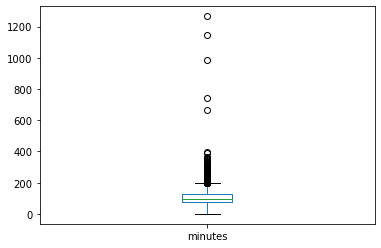

In [3]:
#ATP = ATP.drop(['tourney_id', 'draw_size', 'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'loser_id', 'loser_seed', 'loser_entry'], axis=1)

display(ATP.describe()) # Quick summary of the data
display(ATP.isnull().sum()) # Counting missing values

fig, ax = plt.subplots()
ATP['minutes'].plot.box()
plt.show()

<AxesSubplot:ylabel='Density'>

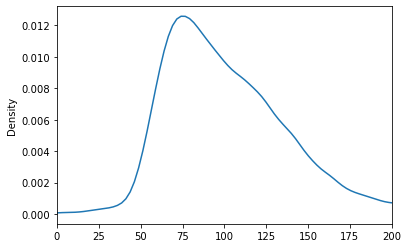

In [6]:
plt.xlim(30, 250)
ATP['minutes'].plot.kde()

<AxesSubplot:ylabel='Frequency'>

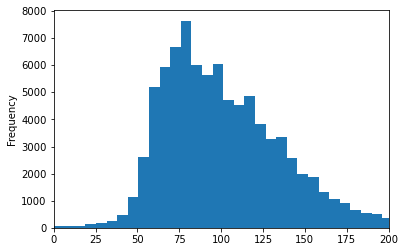

In [ ]:
plt.xlim(30, 250)
ATP['minutes'].plot.hist(bins=200)

<AxesSubplot:>

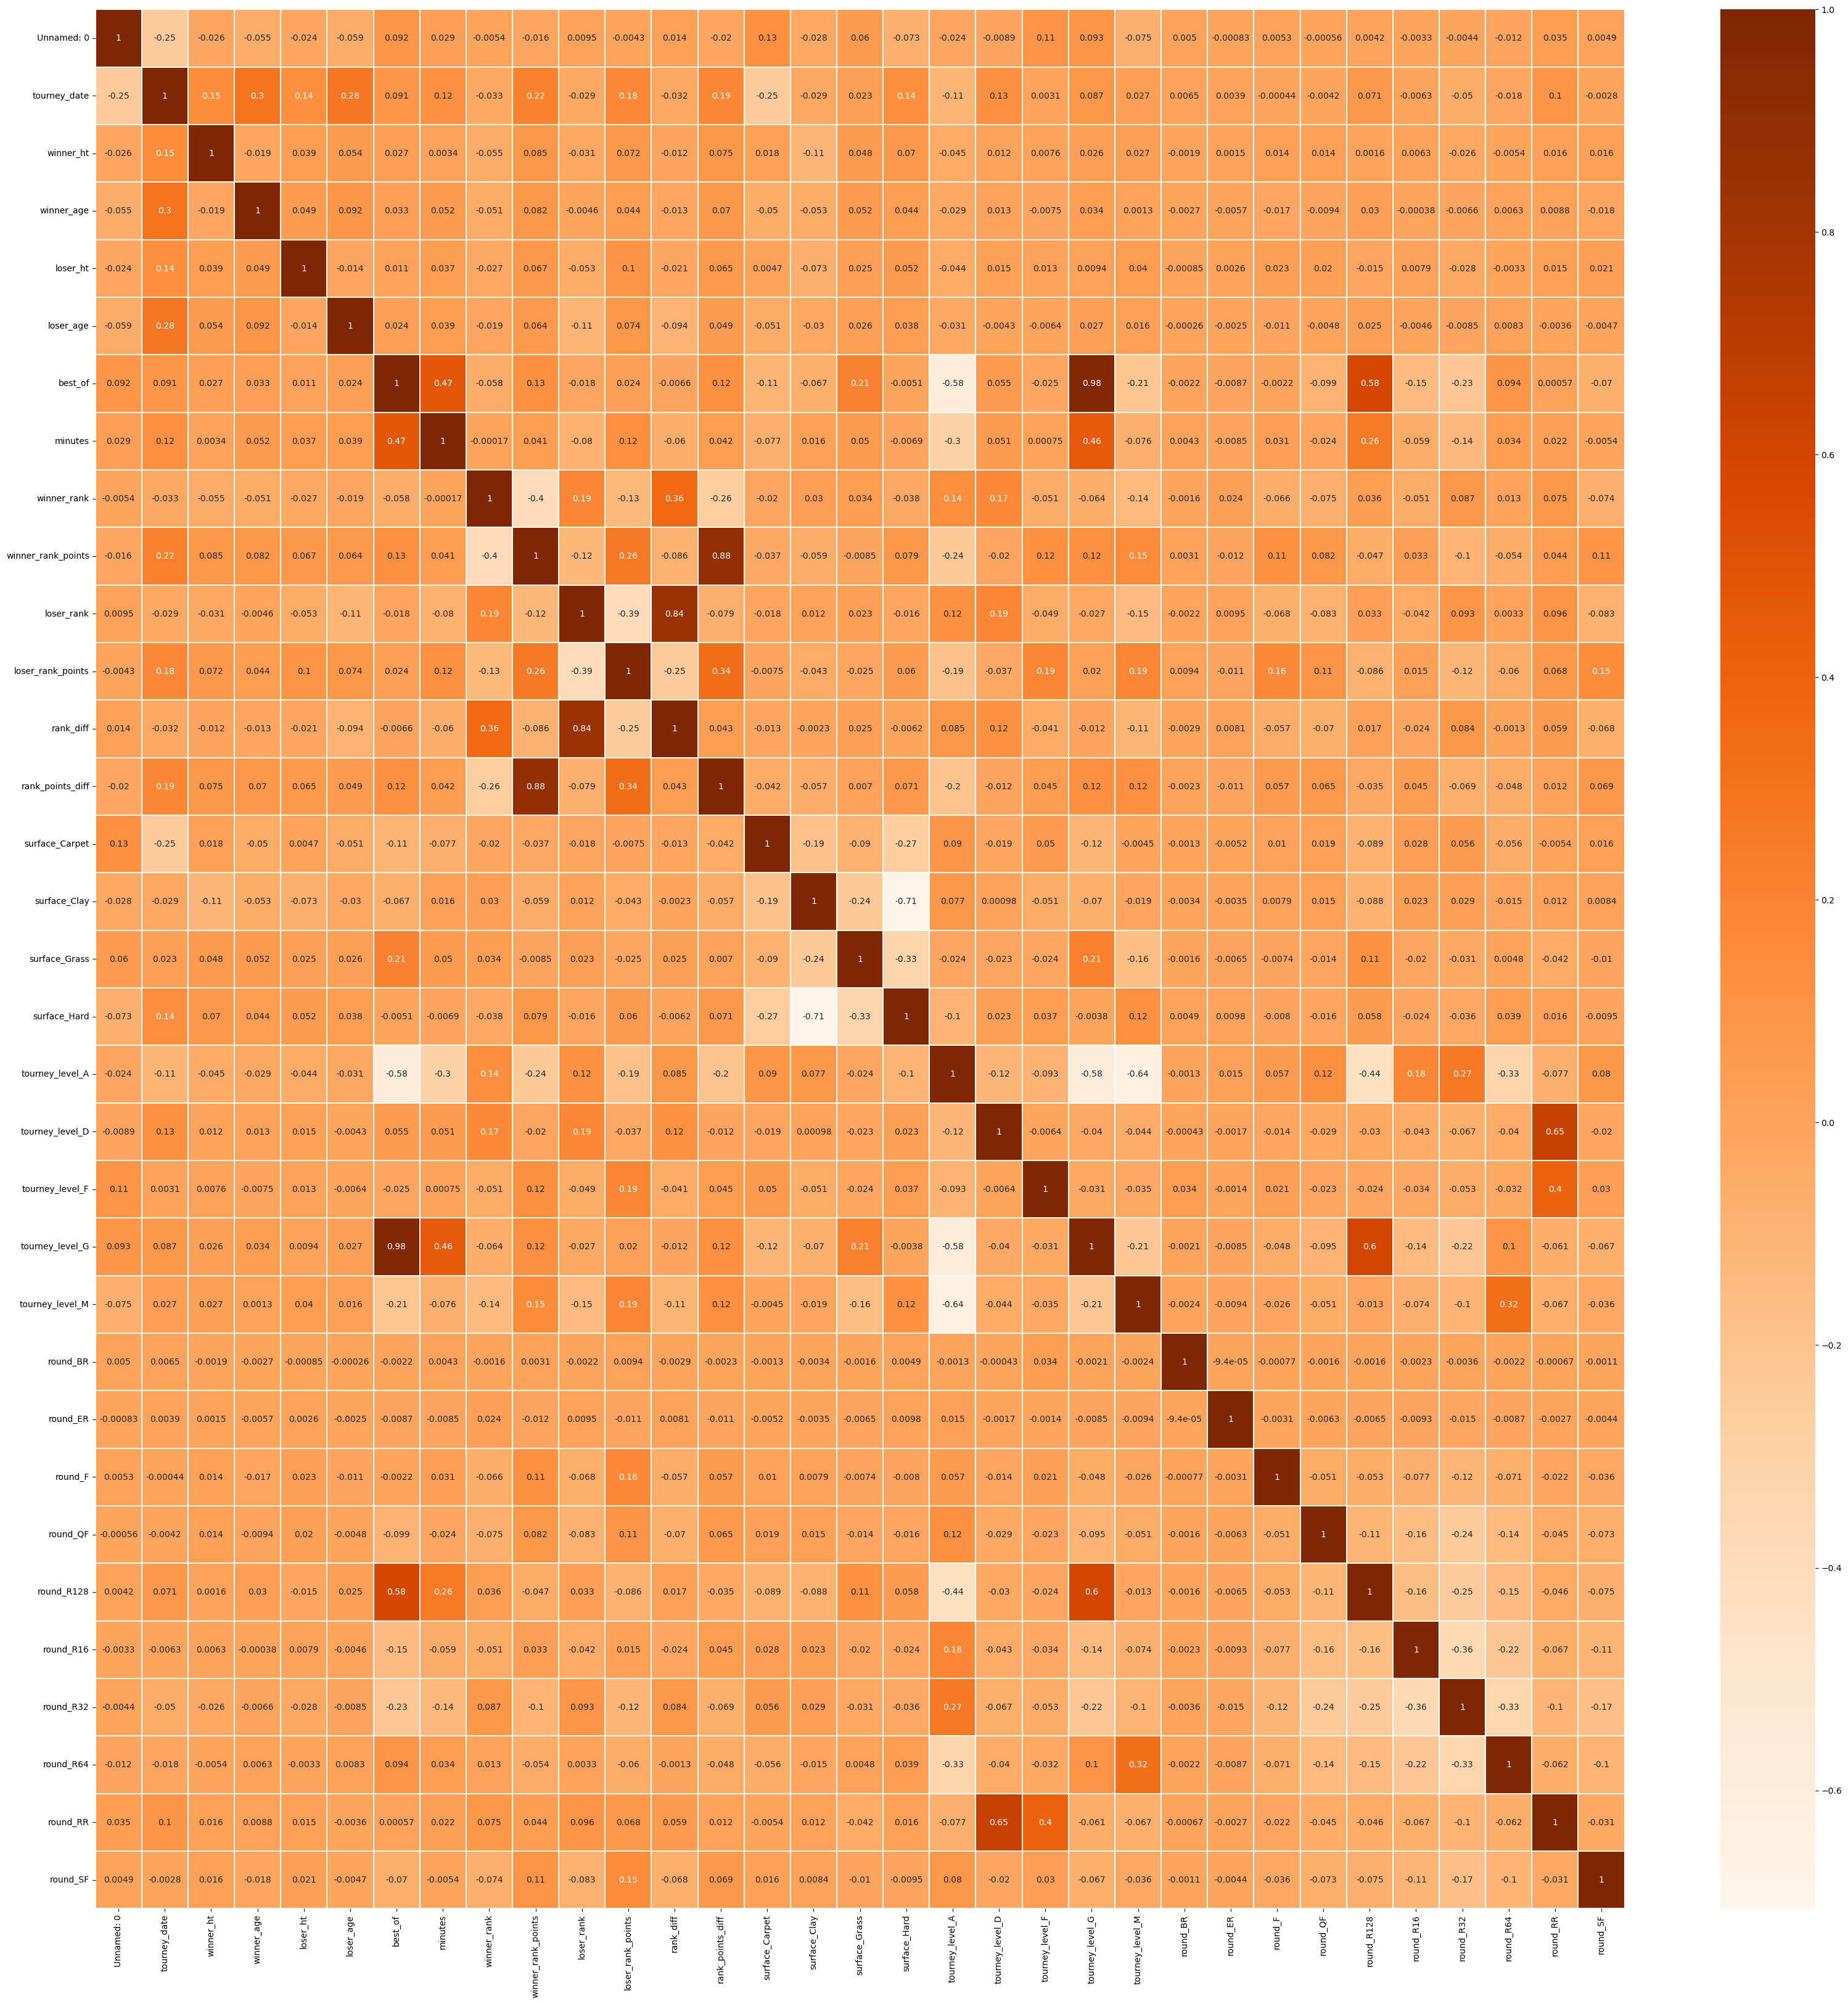

In [5]:
preprocessed_atp = pd.get_dummies(ATP, columns=["surface", "tourney_level", "round"]) 
#preprocessed_atp = pd.get_dummies(ATP, columns=["surface", "best_of", "player_hand", "opp_hand", "tourney_level", "round"])
correlation_matrix = preprocessed_atp.corr()
plt.figure(figsize=(40,40))
sns.heatmap(correlation_matrix, annot= True, linewidth=0.1, cmap= 'Oranges')
    

<AxesSubplot:>

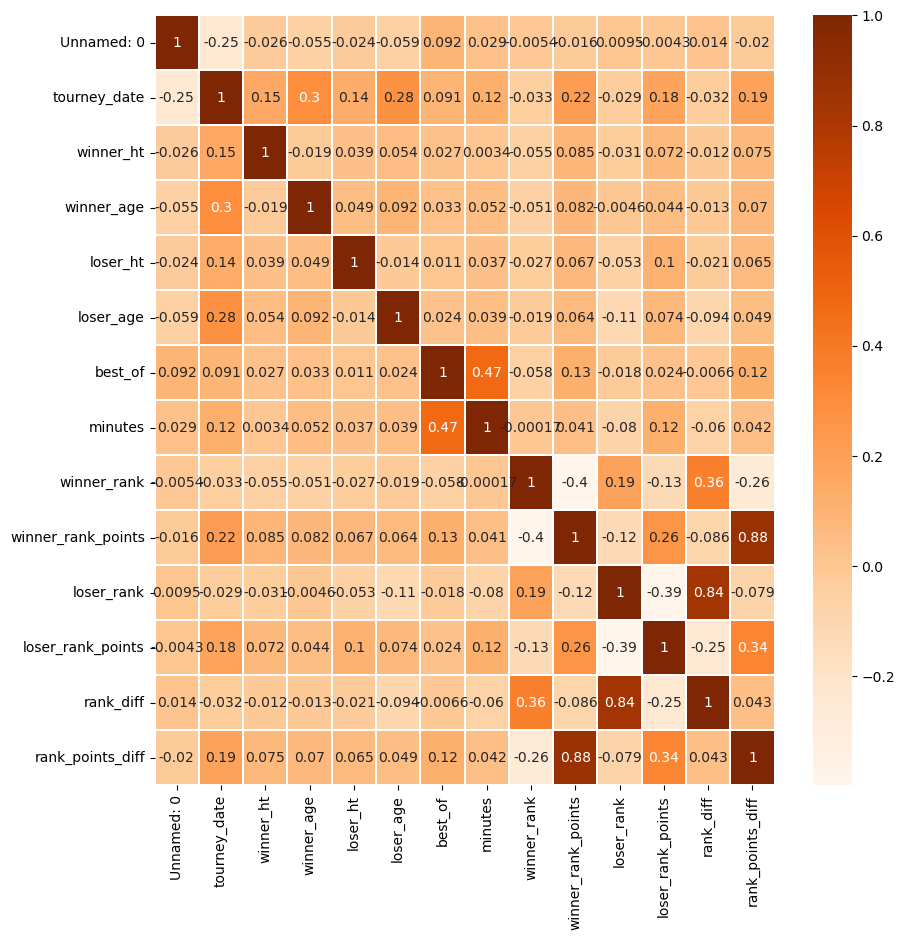

In [33]:
correlation_matrix = ATP.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot= True, linewidth=0.1, cmap= 'Oranges')

In [ ]:
ATP_surface = pd.pivot_table(ATP, values='minutes', index = 'best_of', columns=['surface'], aggfunc=len) # average duration per surface
display(ATP_surface)
print("Data repartition")

surface,Carpet,Clay,Grass,Hard
best_of,,,,
3,5775.0,25153.0,5169.0,36078.0
5,62.0,3826.0,3439.0,7083.0


Data repartition


In [5]:
ATP_surface = pd.pivot_table(ATP, values='minutes', index = 'best_of', columns=['surface'], aggfunc=statistics.median) # average duration per surface
display(ATP_surface)

surface,Carpet,Clay,Grass,Hard
best_of,,,,
3,86.0,92.0,85.0,89.0
5,157.0,142.0,132.0,140.0


In [6]:
ATP_surface = pd.pivot_table(ATP, values='minutes', index = 'best_of', columns=['surface']) # average duration per surface
display(ATP_surface)

surface,Carpet,Clay,Grass,Hard
best_of,,,,
3,91.260500,97.651060,90.148717,94.730919
5,157.967213,149.140686,138.920653,146.636924


d:\anaconda3\envs\sdia-python\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
d:\anaconda3\envs\sdia-python\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
d:\anaconda3\envs\sdia-python\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
d:\anaconda3\envs\sdia-python\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDep

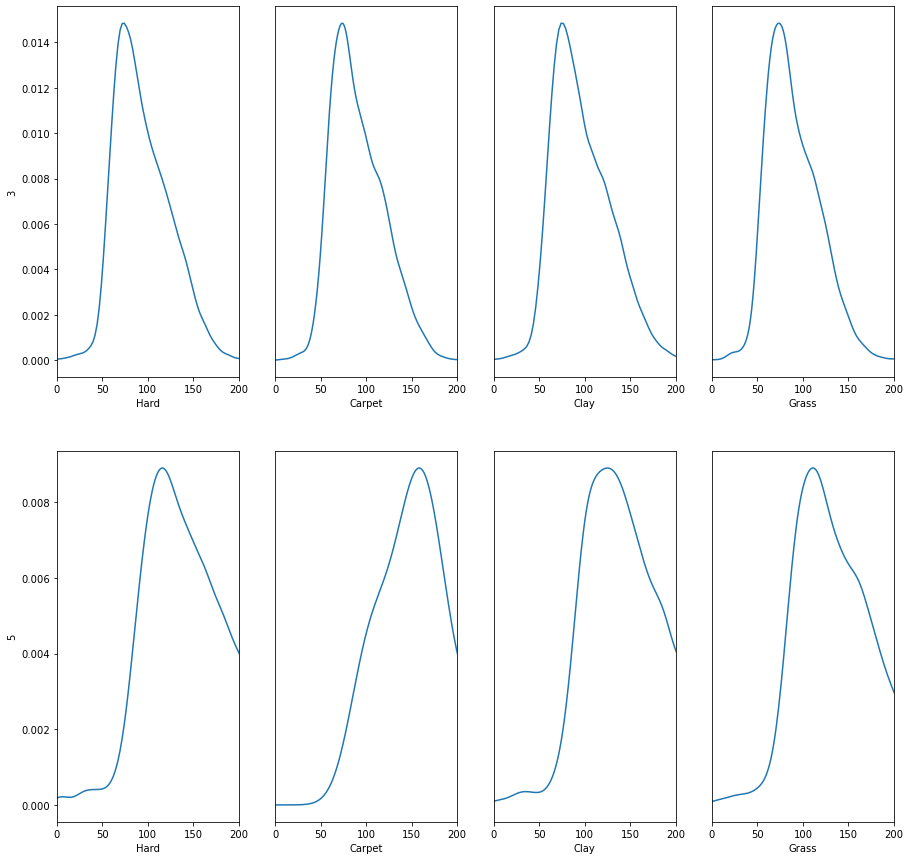

In [36]:
best_of_list = ATP['best_of'].unique()
surface_type_list = ATP["surface"].unique()
fig, axes = plt.subplots(len(best_of_list), len(surface_type_list), figsize=(15, 15))

for row, best_of in enumerate(best_of_list):
    for col, surface_type in enumerate(surface_type_list):
        current_ATP = ATP[ATP['best_of'] == best_of]
        current_ATP = current_ATP[current_ATP['surface'] == surface_type]
        #ATP_bo3 = ATP_bo3.dropna(subset=['rank_diff'])
        ax = axes[row,col]
        current_ATP['minutes'].plot.kde(ax=ax)
        ax.set_xlim([30, 250])
        #ax.set_title('Axis [1, 1]')
        if col == 0:
            ax.set(xlabel=surface_type, ylabel=best_of)
        else:
            ax.set(xlabel=surface_type)
            x_axis = ax.axes.get_yaxis()
            x_axis.set_visible(False)

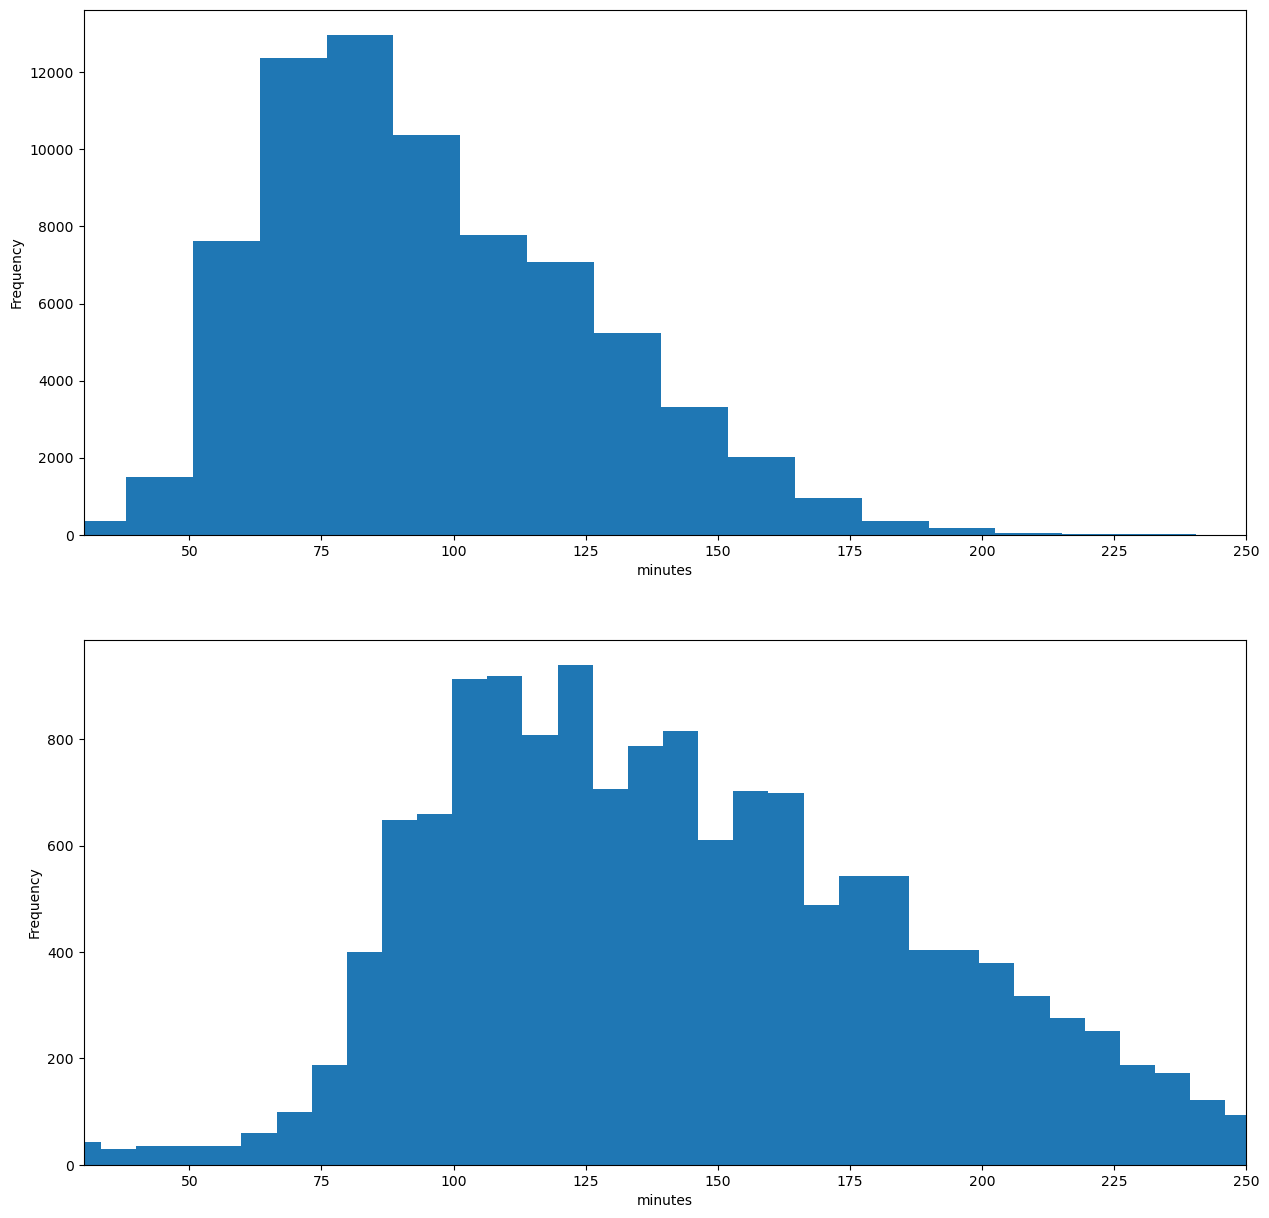

In [7]:
best_of_list = ATP['best_of'].unique()
surface_type_list = ATP["surface"].unique()
fig, axes = plt.subplots(len(best_of_list), 1, figsize=(15, 15))

for row, best_of in enumerate(best_of_list):

    current_ATP = ATP[ATP['best_of'] == best_of]
    # current_ATP = current_ATP[current_ATP['surface'] == surface_type]
    #ATP_bo3 = ATP_bo3.dropna(subset=['rank_diff'])
    ax = axes[row]
    current_ATP['minutes'].plot.hist(bins=100, ax=ax)
    ax.set_xlim([30, 250])
    ax.set_xlabel('minutes')
    #ax.set_title('Axis [1, 1]')
    

## Statistics and Regression

There are many variables to which we have access, and for which we have very little idea of whether they can be useful for building our predictive models. For each one, we will attempt to see if there is any connection to match length by doing some statistics and a regression.

### 1. ATP
#### Surface and best_of

Again, we start by looking at the two main factors for the length of a tennis match. This also gives us values we can use to fill in missing minute values.

Surface and best of are clearly important factors which we will keep for the final models.

#### Player ranking

This variable was an interesting one to look at during the preliminary analysis. We'll explore it more thoroughly here.

In [72]:
ATP["winner_rank_points"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
86580     917.0
86581     860.0
86582    1261.0
86583     698.0
86584     521.0
Name: winner_rank_points, Length: 86585, dtype: float64

In [ ]:
# ATP["rank_diff"] = np.abs(ATP["winner_rank"] - ATP["loser_rank"])
# ATP["rank_points_diff"] = np.abs(ATP["winner_rank_points"] - ATP["loser_rank_points"])
# ATP = ATP.dropna(subset=['rank_diff', 'rank_points_diff'])

#todo: penser à éventuellement encoder le nombre de données à l'aide de couleurs!
#todo: tracer la régression linéaire pour chaque graphe, pour observer la tendance.
#todo : afficher le nombre d'éléments par catégorie de données

best_of_list = ATP['best_of'].unique()
surface_type_list = ATP["surface"].unique()
fig, axes = plt.subplots(len(best_of_list), len(surface_type_list), figsize=(15, 15))
fig.suptitle('Durées moyennes des matchs en fonction de la différence de rang')

for row, best_of in enumerate(best_of_list):
    for col, surface_type in enumerate(surface_type_list):
        current_ATP = ATP[ATP['best_of'] == best_of]
        current_ATP = current_ATP[current_ATP['surface'] == surface_type]
        #ATP_bo3 = ATP_bo3.dropna(subset=['rank_diff'])
        ax = axes[row,col]
        current_ATP["rank_diff_5"] = pd.qcut(current_ATP["rank_diff"], 5)
        # split the data into n categories, each having the same number of elements
        current_ATP["rank_diff_5"] = [int(elem.mid) for elem in current_ATP["rank_diff_5"].values]
        # get the midpoint of the interval
        
    
        current_ATP.boxplot(by ="rank_diff_5", column =["minutes"], grid = False, ax=ax)
        
        #ATP_ranking = pd.pivot_table(current_ATP, values="minutes", columns="rank_diff_15").T
        #ATP_ranking.plot(ax=ax, kind = 'bar', width=1)
        
        # fig1 = ATP_ranking.plot()
        # fig1.xaxis.grid(True)
        ax.set_ylim([0, 250])
        
        if col == 0:
            ax.set(xlabel=surface_type, ylabel=f'best of {best_of}')
        else:
            ax.set(xlabel=surface_type)
            
        if row == 0:
            ax.set(xlabel="rank_diff")
            

# ATP_bo3.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# ATP_bo5.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# plt.show()

C:\Users\dapol\AppData\Local\Temp\ipykernel_10336\3690921409.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_ATP["rank_diff"] = pd.qcut(current_ATP["rank_diff"], 5)
C:\Users\dapol\AppData\Local\Temp\ipykernel_10336\3690921409.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_ATP["rank_diff"] = [int(elem.mid) for elem in current_ATP["rank_diff"].values]
C:\Users\dapol\AppData\Local\Temp\ipykernel_10336\3690921409.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of

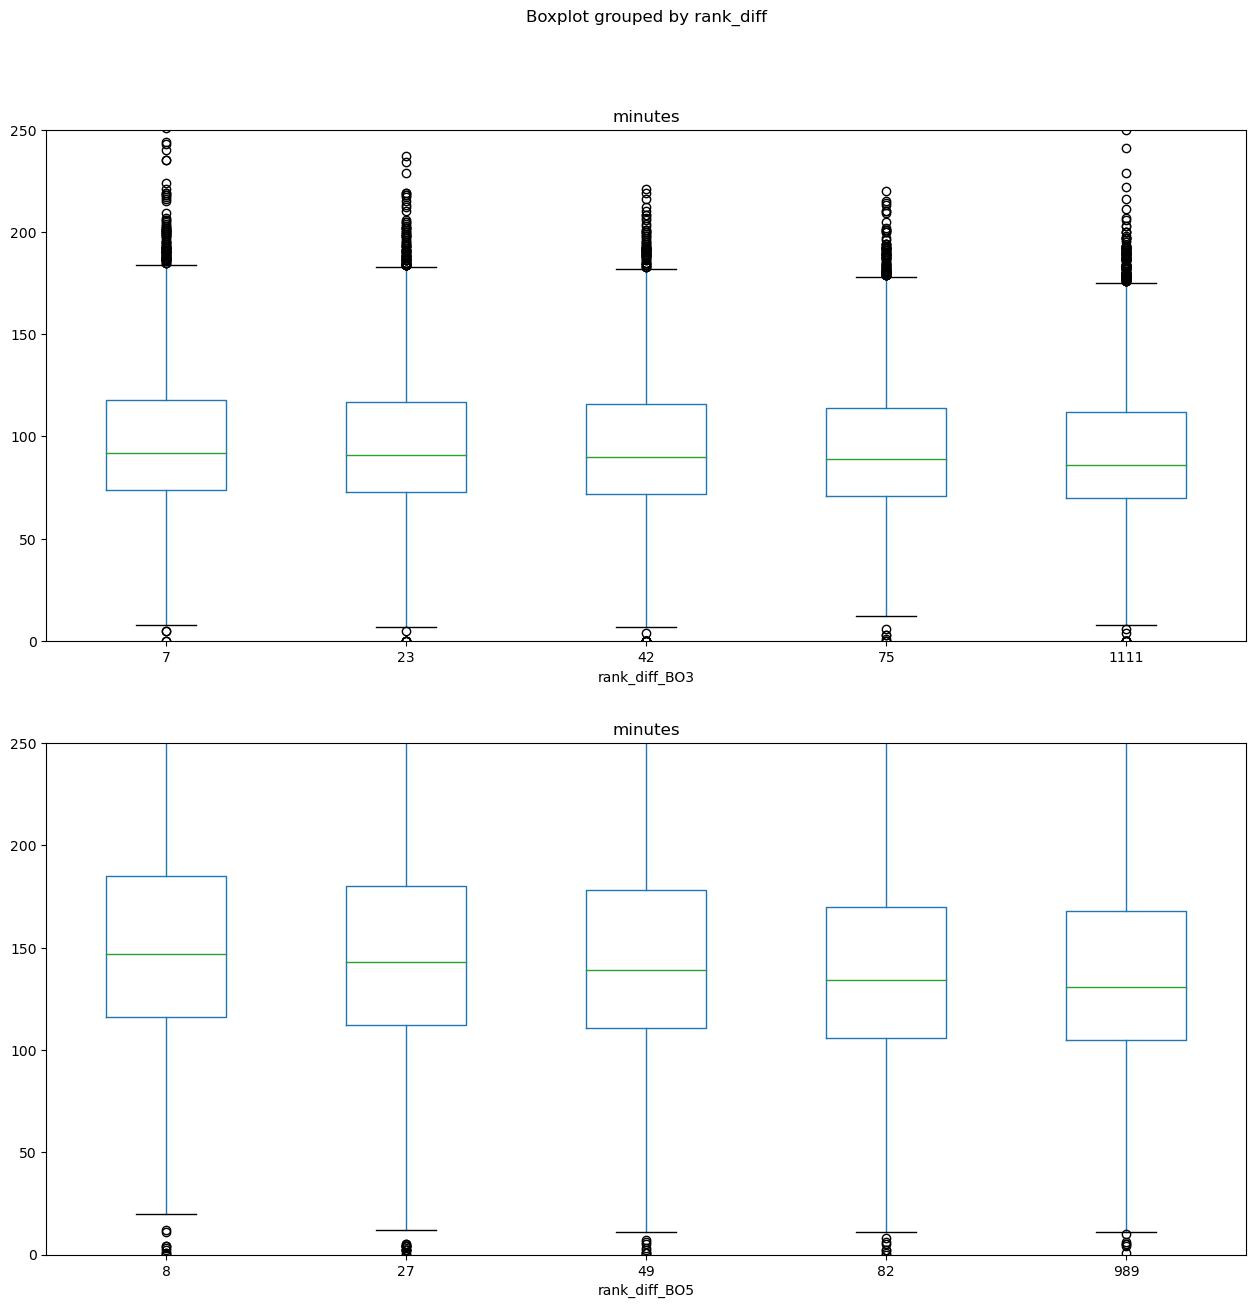

In [9]:
# ATP["rank_diff"] = np.abs(ATP["winner_rank"] - ATP["loser_rank"])
# ATP["rank_points_diff"] = np.abs(ATP["winner_rank_points"] - ATP["loser_rank_points"])
# ATP = ATP.dropna(subset=['rank_diff', 'rank_points_diff'])

#todo: penser à éventuellement encoder le nombre de données à l'aide de couleurs!
#todo: tracer la régression linéaire pour chaque graphe, pour observer la tendance.
#todo : afficher le nombre d'éléments par catégorie de données

best_of_list = ATP['best_of'].unique()
surface_type_list = ATP["surface"].unique()
fig, axes = plt.subplots(len(best_of_list), 1, figsize=(15, 15))
fig.suptitle('Durées moyennes des matchs en fonction de la différence de rang')

for row, best_of in enumerate(best_of_list):
    
    current_ATP = ATP[ATP['best_of'] == best_of]
    
    #ATP_bo3 = ATP_bo3.dropna(subset=['rank_diff'])
    ax = axes[row]
    current_ATP["rank_diff"] = pd.qcut(current_ATP["rank_diff"], 5)
    # split the data into n categories, each having the same number of elements
    current_ATP["rank_diff"] = [int(elem.mid) for elem in current_ATP["rank_diff"].values]
    # get the midpoint of the interval
    

    current_ATP.boxplot(by ="rank_diff", column =["minutes"], grid = False, ax=ax)
    
    #ATP_ranking = pd.pivot_table(current_ATP, values="minutes", columns="rank_diff_15").T
    #ATP_ranking.plot(ax=ax, kind = 'bar', width=1)
    
    # fig1 = ATP_ranking.plot()
    # fig1.xaxis.grid(True)
    ax.set_ylim([0, 250])
    ax.set_xlabel(f'rank_diff_BO{best_of}')
    
            

# ATP_bo3.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# ATP_bo5.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# plt.show()

In [93]:
import seaborn as sb
sb.violinplot(x = 'Academy', y = "Age", order=["Western Australia", "Tasmania","South Australia"],data = dataFrame, inner="stick")

ModuleNotFoundError: No module named 'seaborn'

# Rank_points_diff

In [98]:
np.std(ATP["rank_points_diff"])

1550.670030121483

In [99]:
np.mean(ATP["rank_points_diff"])

1023.9669562155183

In [100]:
np.median(ATP["rank_points_diff"])

515.0

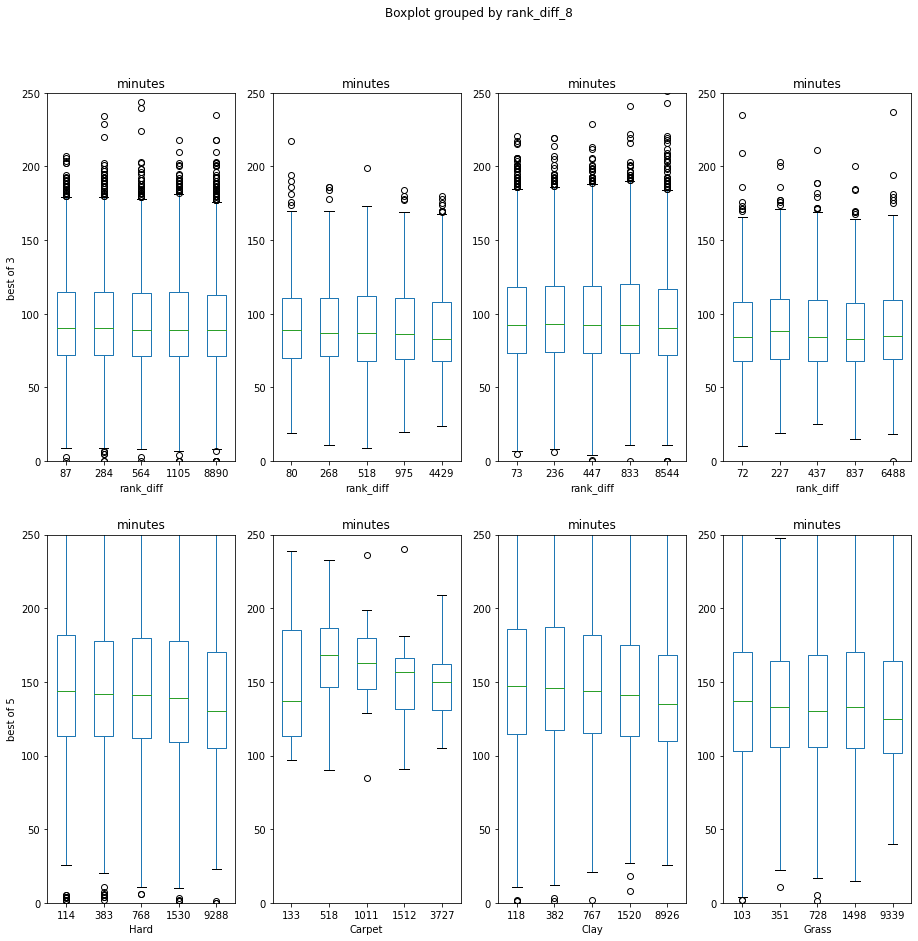

In [105]:
ATP["rank_diff"] = np.abs(ATP["winner_rank"] - ATP["loser_rank"])
ATP["rank_points_diff"] = np.abs(ATP["winner_rank_points"] - ATP["loser_rank_points"])
ATP = ATP.dropna(subset=['rank_diff', 'rank_points_diff'])

#todo: penser à éventuellement encoder le nombre de données à l'aide de couleurs!
#todo: tracer la régression linéaire pour chaque graphe, pour observer la tendance.
#todo : afficher le nombre d'éléments par catégorie de données

best_of_list = ATP['best_of'].unique()
surface_type_list = ATP["surface"].unique()
fig, axes = plt.subplots(len(best_of_list), len(surface_type_list), figsize=(15, 15))
fig.suptitle('Durées moyennes des matchs en fonction de la différence de points atp')

for row, best_of in enumerate(best_of_list):
    for col, surface_type in enumerate(surface_type_list):
        current_ATP = ATP[ATP['best_of'] == best_of]
        current_ATP = current_ATP[current_ATP['surface'] == surface_type]
        #ATP_bo3 = ATP_bo3.dropna(subset=['rank_diff'])
        ax = axes[row,col]
        current_ATP["rank_diff_8"] = pd.qcut(current_ATP["rank_points_diff"], 5)
        current_ATP["rank_diff_8"] = [int(elem.mid) for elem in current_ATP["rank_diff_8"].values]
        
    
        current_ATP.boxplot(by ="rank_diff_8", column =["minutes"], grid = False, ax=ax)
        
        #ATP_ranking = pd.pivot_table(current_ATP, values="minutes", columns="rank_diff_15").T
        #ATP_ranking.plot(ax=ax, kind = 'bar', width=1)
        
        # fig1 = ATP_ranking.plot()
        # fig1.xaxis.grid(True)
        ax.set_ylim([0, 250])
        
        if col == 0:
            ax.set(xlabel=surface_type, ylabel=f'best of {best_of}')
        else:
            ax.set(xlabel=surface_type)
            
        if row == 0:
            ax.set(xlabel="rank_diff")
            

# ATP_bo3.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# ATP_bo5.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# plt.show()

C:\Users\dapol\AppData\Local\Temp\ipykernel_16568\1384600020.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_ATP["rank_diff_8"] = pd.qcut(current_ATP["rank_points_diff"], 5)
C:\Users\dapol\AppData\Local\Temp\ipykernel_16568\1384600020.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_ATP["rank_diff_8"] = [int(elem.mid) for elem in current_ATP["rank_diff_8"].values]
C:\Users\dapol\AppData\Local\Temp\ipykernel_16568\1384600020.py:20: SettingWithCopyWarning: 
A value is trying to be set

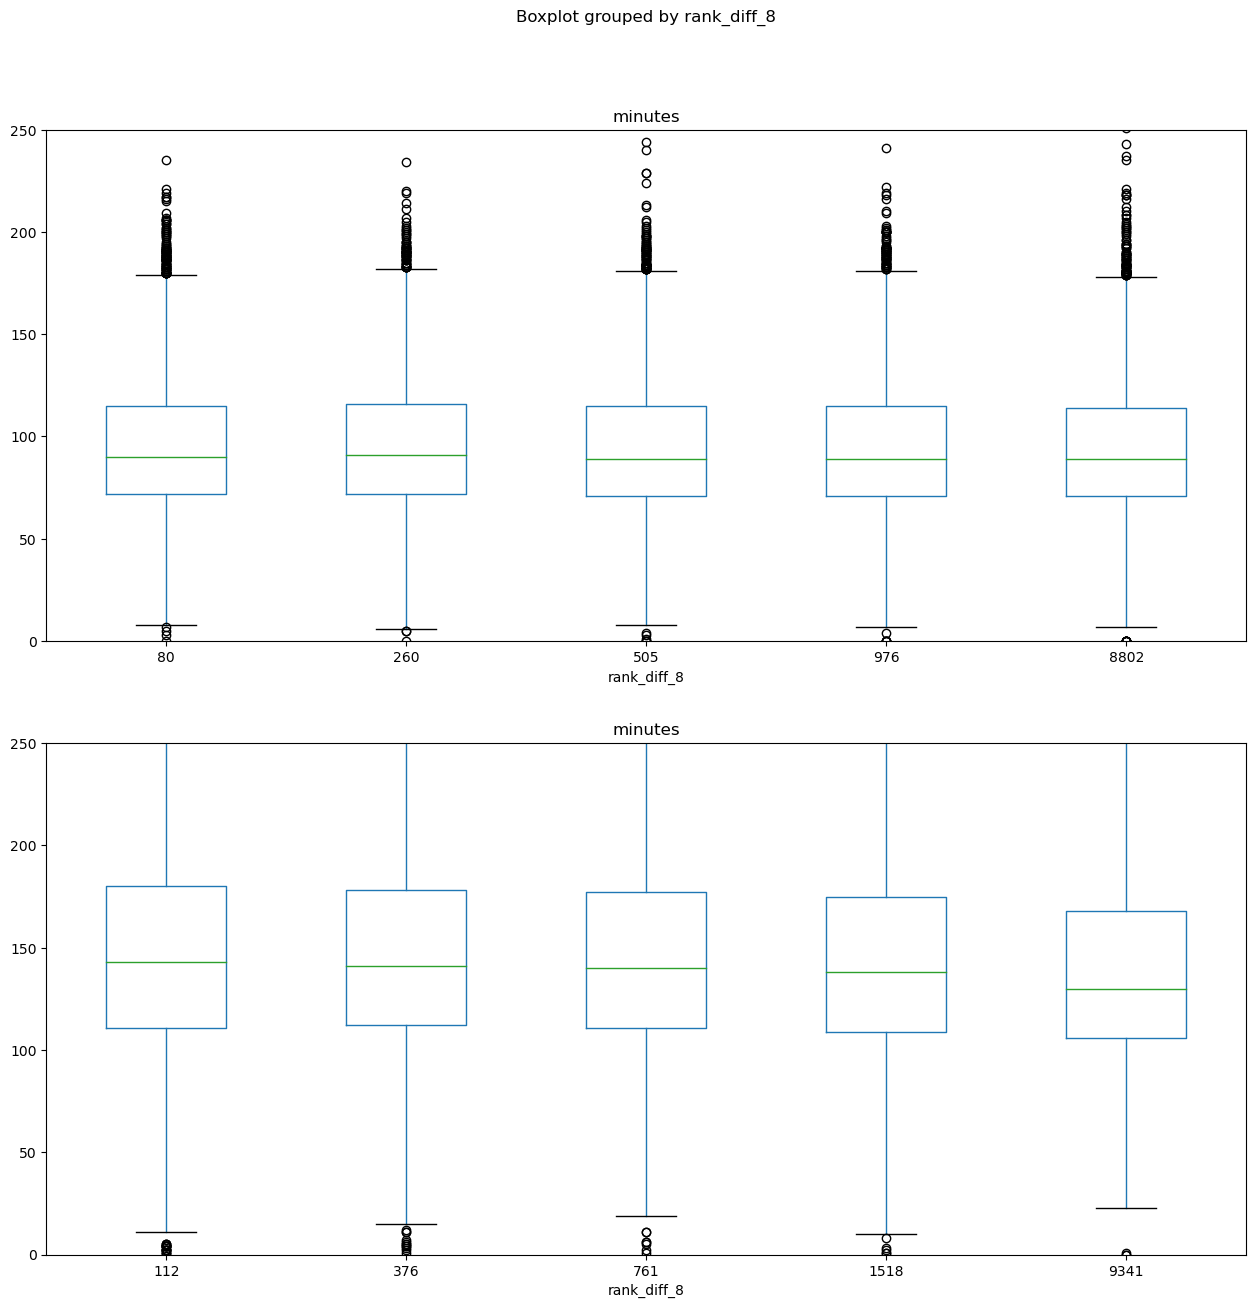

In [11]:
ATP["rank_diff"] = np.abs(ATP["winner_rank"] - ATP["loser_rank"])
ATP["rank_points_diff"] = np.abs(ATP["winner_rank_points"] - ATP["loser_rank_points"])
ATP = ATP.dropna(subset=['rank_diff', 'rank_points_diff'])

#todo: penser à éventuellement encoder le nombre de données à l'aide de couleurs!
#todo: tracer la régression linéaire pour chaque graphe, pour observer la tendance.
#todo : afficher le nombre d'éléments par catégorie de données

best_of_list = ATP['best_of'].unique()
surface_type_list = ATP["surface"].unique()
fig, axes = plt.subplots(len(best_of_list), 1, figsize=(15, 15))
fig.suptitle('Durées moyennes des matchs en fonction de la différence de points atp')

for row, best_of in enumerate(best_of_list):
    
        current_ATP = ATP[ATP['best_of'] == best_of]
        
        #ATP_bo3 = ATP_bo3.dropna(subset=['rank_diff'])
        ax = axes[row]
        current_ATP["rank_diff_8"] = pd.qcut(current_ATP["rank_points_diff"], 5)
        current_ATP["rank_diff_8"] = [int(elem.mid) for elem in current_ATP["rank_diff_8"].values]
        
    
        current_ATP.boxplot(by ="rank_diff_8", column =["minutes"], grid = False, ax=ax)
        
        #ATP_ranking = pd.pivot_table(current_ATP, values="minutes", columns="rank_diff_15").T
        #ATP_ranking.plot(ax=ax, kind = 'bar', width=1)
        
        # fig1 = ATP_ranking.plot()
        # fig1.xaxis.grid(True)
        ax.set_ylim([0, 250])
        
        
            

# ATP_bo3.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# ATP_bo5.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# plt.show()

# Rank_points_abs

In [4]:
ATP = ATP.dropna(subset=["winner_rank_points","loser_rank_points"])

In [5]:
np.std(ATP["winner_rank_points"])

1755.0150130597867

In [6]:
np.mean(ATP["winner_rank_points"])

1456.815013499237

In [7]:
np.median(ATP["winner_rank_points"])

900.0

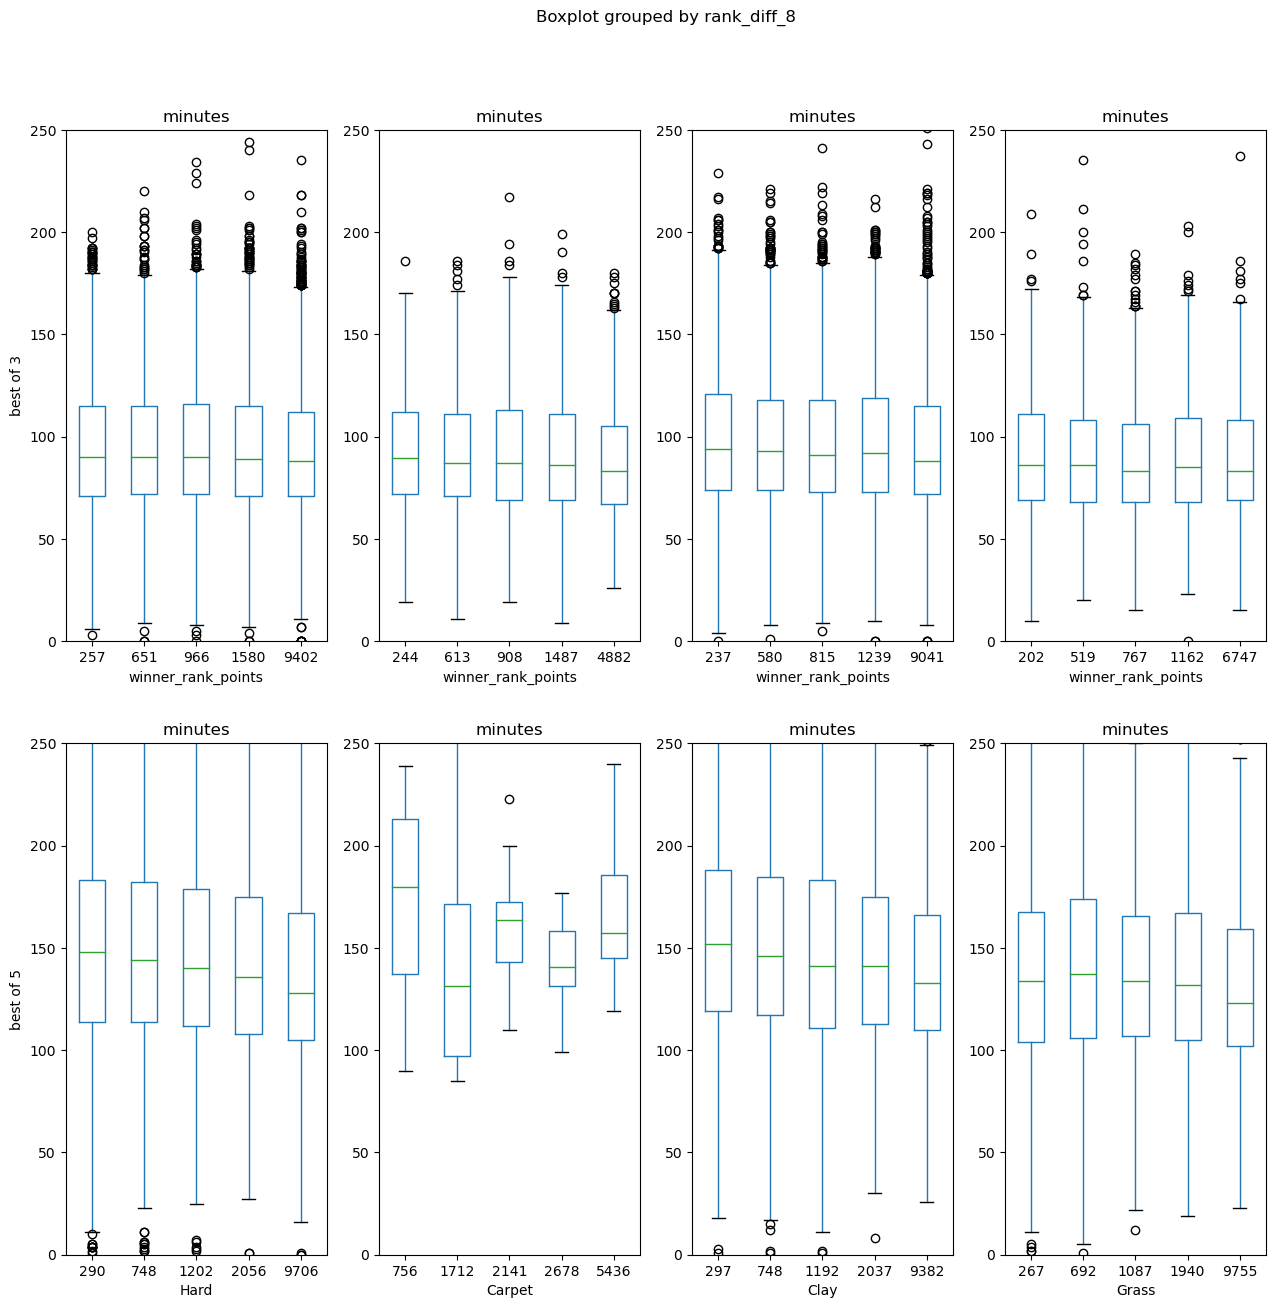

In [12]:

#Winner rank points

#todo: penser à éventuellement encoder le nombre de données à l'aide de couleurs!
#todo: tracer la régression linéaire pour chaque graphe, pour observer la tendance.
#todo : afficher le nombre d'éléments par catégorie de données

best_of_list = ATP['best_of'].unique()
surface_type_list = ATP["surface"].unique()
fig, axes = plt.subplots(len(best_of_list), len(surface_type_list), figsize=(15, 15))
fig.suptitle('Durées moyennes des matchs en fonction des points atp du winner')

for row, best_of in enumerate(best_of_list):
    for col, surface_type in enumerate(surface_type_list):
        current_ATP = ATP[ATP['best_of'] == best_of]
        current_ATP = current_ATP[current_ATP['surface'] == surface_type]
        #ATP_bo3 = ATP_bo3.dropna(subset=['rank_diff'])
        ax = axes[row,col]
        current_ATP["rank_diff_8"] = pd.qcut(current_ATP["winner_rank_points"], 5)
        current_ATP["rank_diff_8"] = [int(elem.mid) for elem in current_ATP["rank_diff_8"].values]
        
    
        current_ATP.boxplot(by ="rank_diff_8", column =["minutes"], grid = False, ax=ax)
        
        #ATP_ranking = pd.pivot_table(current_ATP, values="minutes", columns="rank_diff_15").T
        #ATP_ranking.plot(ax=ax, kind = 'bar', width=1)
        
        # fig1 = ATP_ranking.plot()
        # fig1.xaxis.grid(True)
        ax.set_ylim([0, 250])
        
        if col == 0:
            ax.set(xlabel=surface_type, ylabel=f'best of {best_of}')
        else:
            ax.set(xlabel=surface_type)
            
        if row == 0:
            ax.set(xlabel="winner_rank_points")
            

# ATP_bo3.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# ATP_bo5.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# plt.show()

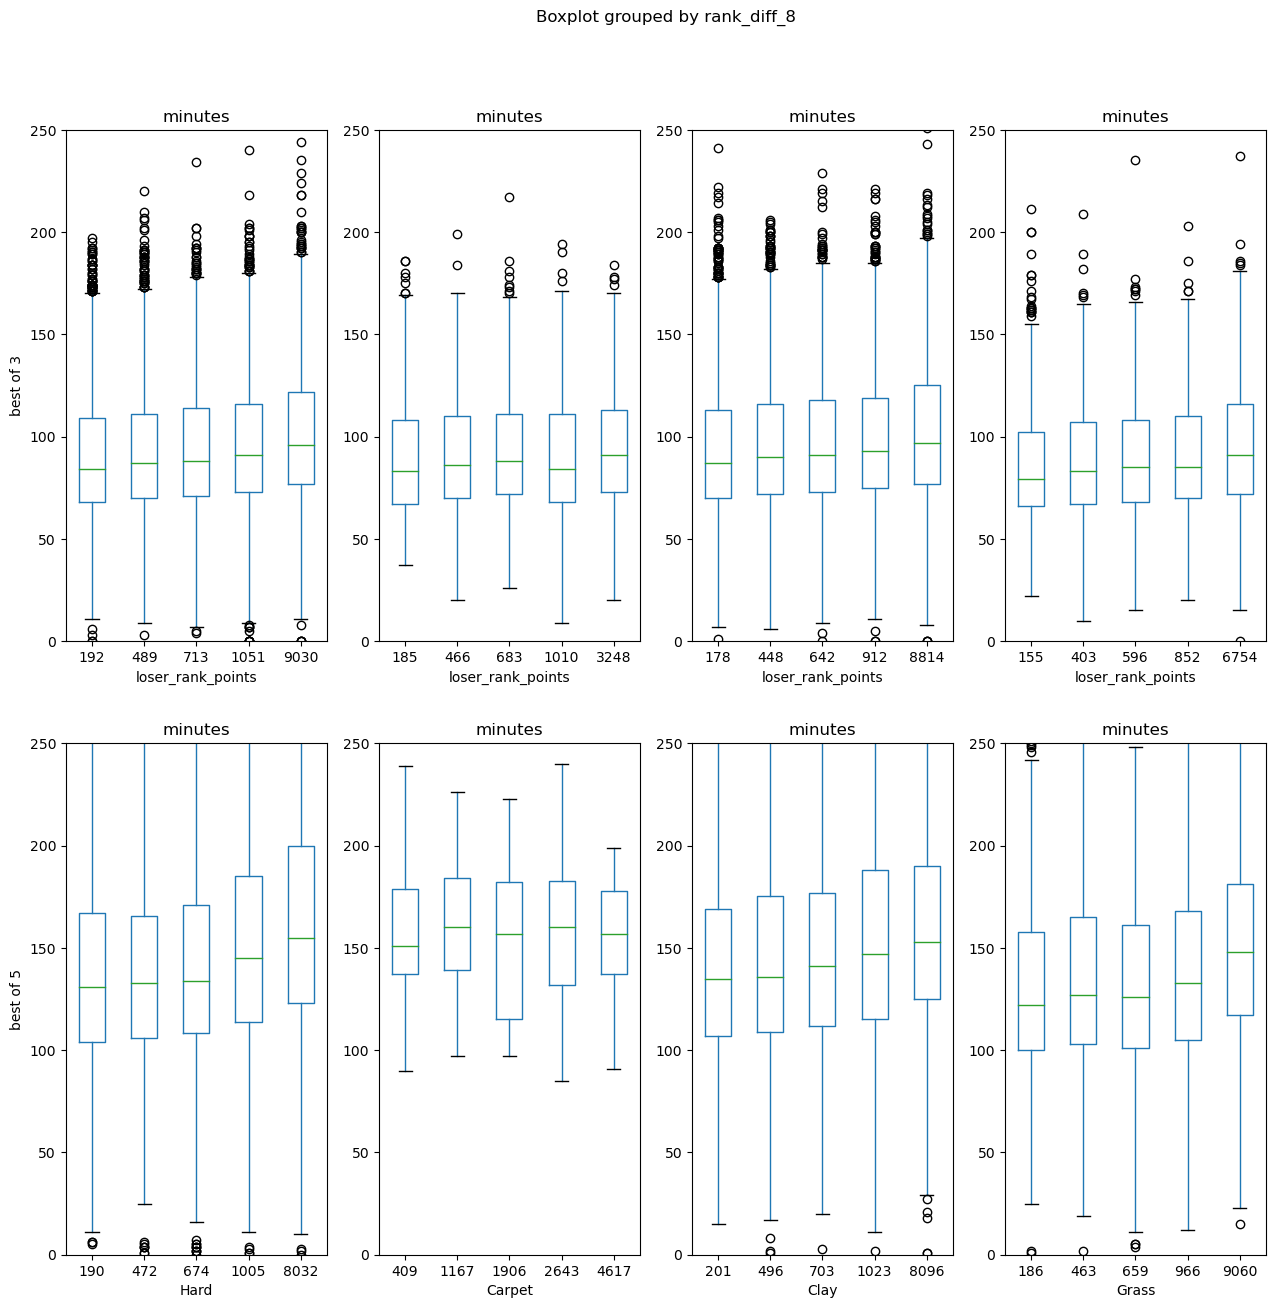

In [13]:

# Loser Rank points

#todo: penser à éventuellement encoder le nombre de données à l'aide de couleurs!
#todo: tracer la régression linéaire pour chaque graphe, pour observer la tendance.
#todo : afficher le nombre d'éléments par catégorie de données

best_of_list = ATP['best_of'].unique()
surface_type_list = ATP["surface"].unique()
fig, axes = plt.subplots(len(best_of_list), len(surface_type_list), figsize=(15, 15))
fig.suptitle('Durées moyennes des matchs en fonction des points atp du winner')

for row, best_of in enumerate(best_of_list):
    for col, surface_type in enumerate(surface_type_list):
        current_ATP = ATP[ATP['best_of'] == best_of]
        current_ATP = current_ATP[current_ATP['surface'] == surface_type]
        #ATP_bo3 = ATP_bo3.dropna(subset=['rank_diff'])
        ax = axes[row,col]
        current_ATP["rank_diff_8"] = pd.qcut(current_ATP["loser_rank_points"], 5)
        current_ATP["rank_diff_8"] = [int(elem.mid) for elem in current_ATP["rank_diff_8"].values]
        
    
        current_ATP.boxplot(by ="rank_diff_8", column =["minutes"], grid = False, ax=ax)
        
        #ATP_ranking = pd.pivot_table(current_ATP, values="minutes", columns="rank_diff_15").T
        #ATP_ranking.plot(ax=ax, kind = 'bar', width=1)
        
        # fig1 = ATP_ranking.plot()
        # fig1.xaxis.grid(True)
        ax.set_ylim([0, 250])
        
        if col == 0:
            ax.set(xlabel=surface_type, ylabel=f'best of {best_of}')
        else:
            ax.set(xlabel=surface_type)
            
        if row == 0:
            ax.set(xlabel="loser_rank_points")
            

# ATP_bo3.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# ATP_bo5.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# plt.show()

In [9]:
ATP = ATP.dropna(subset=["winner_rank","loser_rank"])


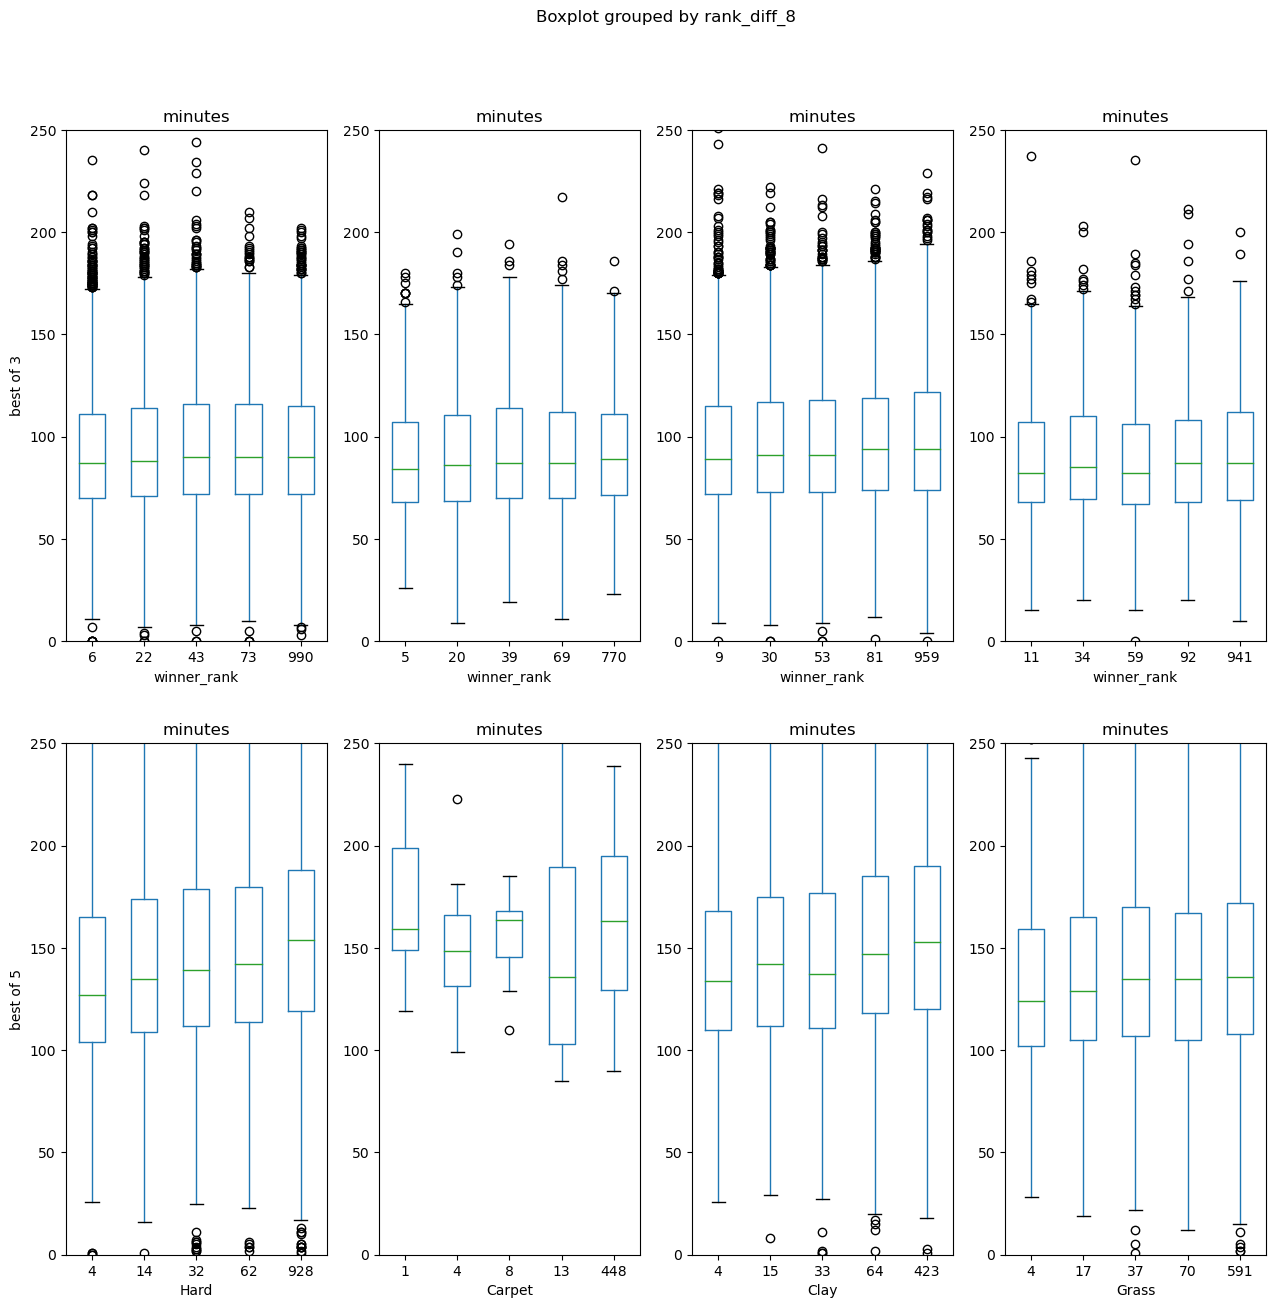

In [10]:

# Winner rank
ATP = ATP.dropna(subset=["winner_rank","loser_rank"])

#todo: penser à éventuellement encoder le nombre de données à l'aide de couleurs!
#todo: tracer la régression linéaire pour chaque graphe, pour observer la tendance.
#todo : afficher le nombre d'éléments par catégorie de données

best_of_list = ATP['best_of'].unique()
surface_type_list = ATP["surface"].unique()
fig, axes = plt.subplots(len(best_of_list), len(surface_type_list), figsize=(15, 15))
fig.suptitle('Durées moyennes des matchs en fonction des points atp du winner')

for row, best_of in enumerate(best_of_list):
    for col, surface_type in enumerate(surface_type_list):
        current_ATP = ATP[ATP['best_of'] == best_of]
        current_ATP = current_ATP[current_ATP['surface'] == surface_type]
        #ATP_bo3 = ATP_bo3.dropna(subset=['rank_diff'])
        ax = axes[row,col]
        current_ATP["rank_diff_8"] = pd.qcut(current_ATP["winner_rank"], 5)
        current_ATP["rank_diff_8"] = [int(elem.mid) for elem in current_ATP["rank_diff_8"].values]
        
    
        current_ATP.boxplot(by ="rank_diff_8", column =["minutes"], grid = False, ax=ax)
        
        #ATP_ranking = pd.pivot_table(current_ATP, values="minutes", columns="rank_diff_15").T
        #ATP_ranking.plot(ax=ax, kind = 'bar', width=1)
        
        # fig1 = ATP_ranking.plot()
        # fig1.xaxis.grid(True)
        ax.set_ylim([0, 250])
        
        if col == 0:
            ax.set(xlabel=surface_type, ylabel=f'best of {best_of}')
        else:
            ax.set(xlabel=surface_type)
            
        if row == 0:
            ax.set(xlabel="winner_rank")
            

# ATP_bo3.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# ATP_bo5.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# plt.show()

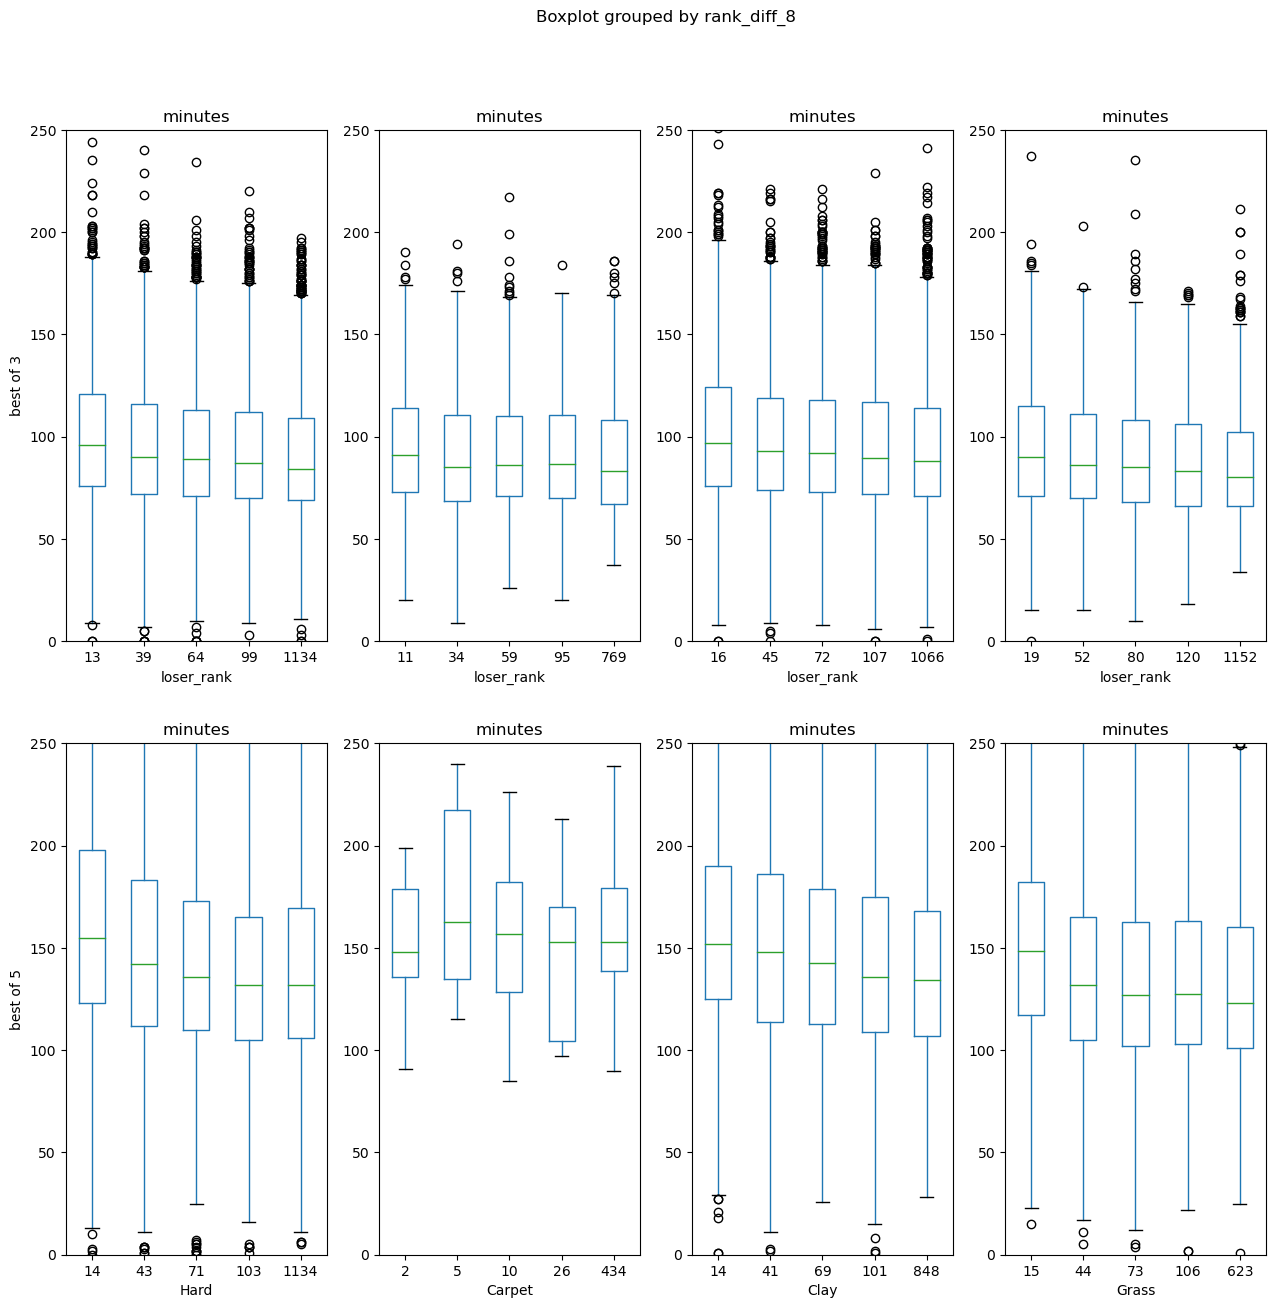

In [14]:

# Loser rank
ATP = ATP.dropna(subset=["winner_rank","loser_rank"])

#todo: penser à éventuellement encoder le nombre de données à l'aide de couleurs!
#todo: tracer la régression linéaire pour chaque graphe, pour observer la tendance.
#todo : afficher le nombre d'éléments par catégorie de données

best_of_list = ATP['best_of'].unique()
surface_type_list = ATP["surface"].unique()
fig, axes = plt.subplots(len(best_of_list), len(surface_type_list), figsize=(15, 15))
fig.suptitle('Durées moyennes des matchs en fonction des points atp du winner')

for row, best_of in enumerate(best_of_list):
    for col, surface_type in enumerate(surface_type_list):
        current_ATP = ATP[ATP['best_of'] == best_of]
        current_ATP = current_ATP[current_ATP['surface'] == surface_type]
        #ATP_bo3 = ATP_bo3.dropna(subset=['rank_diff'])
        ax = axes[row,col]
        current_ATP["rank_diff_8"] = pd.qcut(current_ATP["loser_rank"], 5)
        current_ATP["rank_diff_8"] = [int(elem.mid) for elem in current_ATP["rank_diff_8"].values]
        
    
        current_ATP.boxplot(by ="rank_diff_8", column =["minutes"], grid = False, ax=ax)
        
        #ATP_ranking = pd.pivot_table(current_ATP, values="minutes", columns="rank_diff_15").T
        #ATP_ranking.plot(ax=ax, kind = 'bar', width=1)
        
        # fig1 = ATP_ranking.plot()
        # fig1.xaxis.grid(True)
        ax.set_ylim([0, 250])
        
        if col == 0:
            ax.set(xlabel=surface_type, ylabel=f'best of {best_of}')
        else:
            ax.set(xlabel=surface_type)
            
        if row == 0:
            ax.set(xlabel="loser_rank")
            

# ATP_bo3.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# ATP_bo5.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# plt.show()

In [15]:
ATP.columns

Index(['Unnamed: 0', 'tourney_name', 'surface', 'tourney_level',
       'tourney_date', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc',
       'winner_age', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'score', 'best_of', 'round', 'minutes', 'winner_rank',
       'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

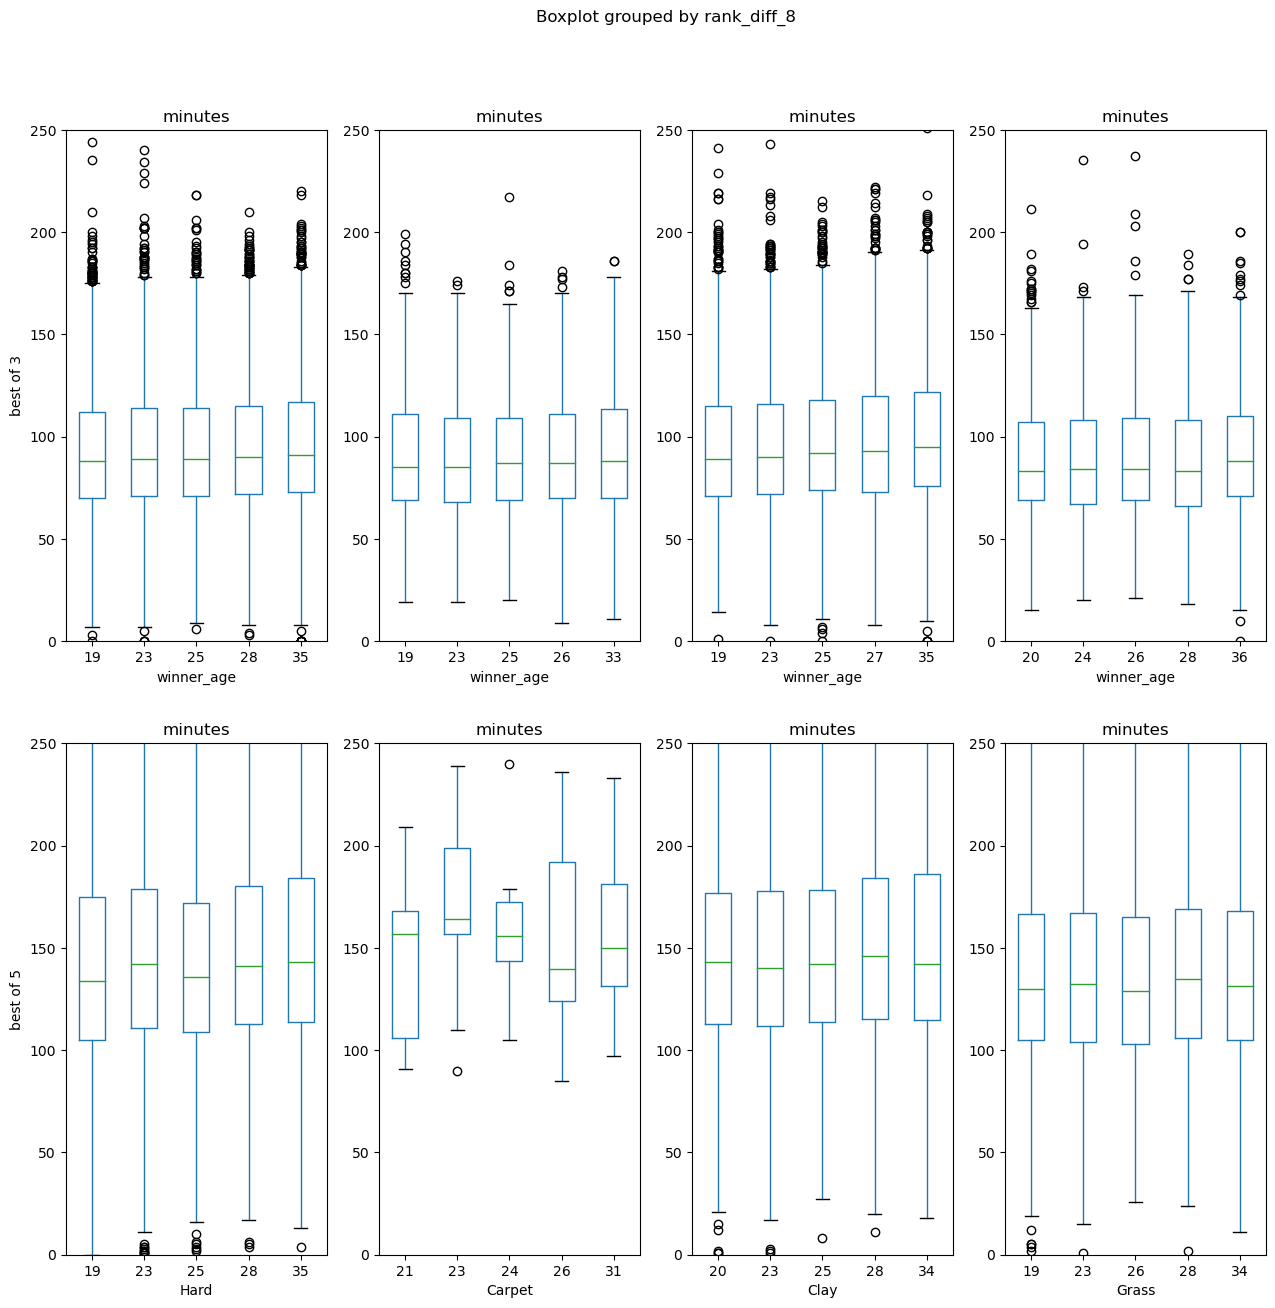

In [16]:

# Age
ATP = ATP.dropna(subset=['winner_age'])

#todo: penser à éventuellement encoder le nombre de données à l'aide de couleurs!
#todo: tracer la régression linéaire pour chaque graphe, pour observer la tendance.
#todo : afficher le nombre d'éléments par catégorie de données

best_of_list = ATP['best_of'].unique()
surface_type_list = ATP["surface"].unique()
fig, axes = plt.subplots(len(best_of_list), len(surface_type_list), figsize=(15, 15))
fig.suptitle('Durées moyennes des matchs en fonction des points atp du winner')

for row, best_of in enumerate(best_of_list):
    for col, surface_type in enumerate(surface_type_list):
        current_ATP = ATP[ATP['best_of'] == best_of]
        current_ATP = current_ATP[current_ATP['surface'] == surface_type]
        #ATP_bo3 = ATP_bo3.dropna(subset=['rank_diff'])
        ax = axes[row,col]
        current_ATP["rank_diff_8"] = pd.qcut(current_ATP["winner_age"], 5)
        current_ATP["rank_diff_8"] = [int(elem.mid) for elem in current_ATP["rank_diff_8"].values]
        
    
        current_ATP.boxplot(by ="rank_diff_8", column =["minutes"], grid = False, ax=ax)
        
        #ATP_ranking = pd.pivot_table(current_ATP, values="minutes", columns="rank_diff_15").T
        #ATP_ranking.plot(ax=ax, kind = 'bar', width=1)
        
        # fig1 = ATP_ranking.plot()
        # fig1.xaxis.grid(True)
        ax.set_ylim([0, 250])
        
        if col == 0:
            ax.set(xlabel=surface_type, ylabel=f'best of {best_of}')
        else:
            ax.set(xlabel=surface_type)
            
        if row == 0:
            ax.set(xlabel="winner_age")
            

# ATP_bo3.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# ATP_bo5.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
# plt.show()

## Conclusion : On observe une légère tendance, mais celle-ci reste très légère par rapport à la variabilité des durées au sein de mêmes groupes: Cette tendance ne suffit clairement pas pour prédire la durée d'un match.

There is an interesting trend here ! We can observe a few things :
- A global downwards trend.
- Both graph exhibit the same "zones" :
    - 1. First, a range where there is little variation and the trend is clear.
    - 2. Second, a range where there is a lot of variation but where the trend still holds.
    - 3. Outliers, the trend goes out the window.

For bo3s :  
- range 1.1 = [0, 150] (very little variation)  
- range 1.2 = [150, 400]  
- range 2 = [400, 1300]  
- range 3 = 1300+  

For bo5s :  
- range 1 = [0, 200]
- range 2 = [200, 800]  (admittedly, the trend isn't THAT clear here)
- range 3 = 800+  

To confirm this trend, let's do a linear regression.

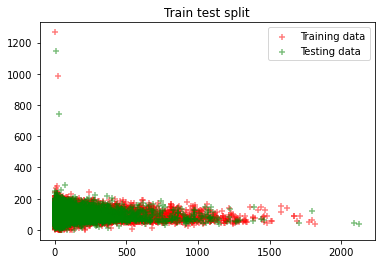

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Train test split for supervised learning
x_train, x_test, y_train, y_test = train_test_split(ATP_bo3.rank_diff, ATP_bo3.minutes)
plt.scatter(x_train, y_train, label='Training data', color='r', alpha=.5, marker='+')
plt.scatter(x_test, y_test, label='Testing data', color='g', alpha=.5, marker='+')
plt.legend()
plt.title("Train test split")
plt.show()

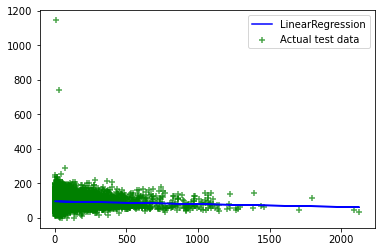

0.0037616119875203413

In [15]:
# Create the linear model and train it
LR = LinearRegression()
LR.fit(x_train.values.reshape(-1,1), y_train.values)

# Use model to predict on test data
prediction = LR.predict(x_test.values.reshape(-1,1))
plt.plot(x_test, prediction, label='LinearRegression', color='b')
plt.scatter(x_test, y_test, label='Actual test data', color='g', alpha=.7, marker='+')
plt.legend()
plt.show()

# Scoring
LR.score(x_test.values.reshape(-1,1), y_test.values)

Well, the trend is what we expected but the score is terrible !  
It gets better if we just take into account the range 1.

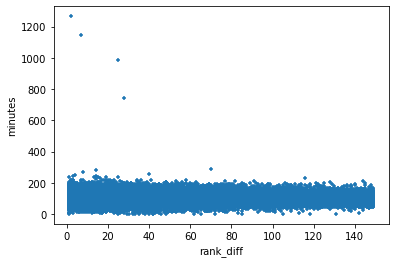

In [16]:
ATP_bo3_r1 = ATP_bo3[ATP_bo3['rank_diff'] < 150]
ATP_bo3_r1.plot(kind='scatter', x='rank_diff', y='minutes', marker='+')
plt.show()

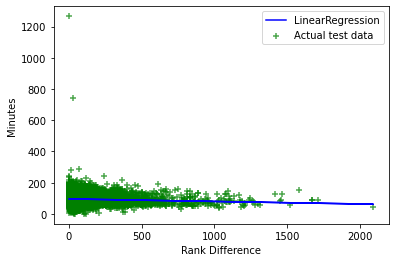

0.0036540658295318718

In [18]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(ATP_bo3.rank_diff, ATP_bo3.minutes)

# Create the linear model and train it
LR = LinearRegression()
LR.fit(x_train.values.reshape(-1,1), y_train.values)

# Use model to predict on test data
prediction = LR.predict(x_test.values.reshape(-1,1))
plt.plot(x_test, prediction, label='LinearRegression', color='b')
plt.scatter(x_test, y_test, label='Actual test data', color='g', alpha=.7, marker='+')
plt.xlabel('Rank Difference')
plt.ylabel('Minutes')
plt.legend()
plt.show()

# Scoring
LR.score(x_test.values.reshape(-1,1), y_test.values)

That's not necessarily much better. But, in any case, we have the information that we need : The difference in player rank is an interesting variable which should be kept for the final model.